This is a very famous data set and we'll be trying to predict a classification- survival or deceased.

In [124]:
#import the dataset
import pandas as pd
df=pd.read_csv('C://Users//kajal kapasiya//Desktop//data science//dataset//krishnaik_coding//EDA//titanic_train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
#drop the non required columns
df.drop(['PassengerId','Name','Ticket','Fare'],axis=1,inplace=True)

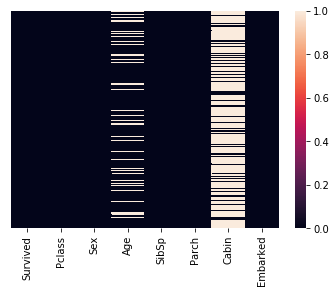

In [126]:
#Identify the features with null values
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(df.isnull(),yticklabels=False)

In [127]:
#create columns sex and embarked to hold generated dummy values
sex=pd.get_dummies(df['Sex'],drop_first=True)
embarked=pd.get_dummies(df['Embarked'],drop_first=True)

In [128]:
#drop actual sex and embarked columns so that dummies can be added and drop cabin column as it is having many NaN 
#values and doesn't make sense to keep this column
df.drop(['Cabin','Sex','Embarked'],axis=1,inplace=True)

In [129]:
#concat dummy columns sex and embarked to datatset
df=pd.concat([df,sex,embarked],axis=1)

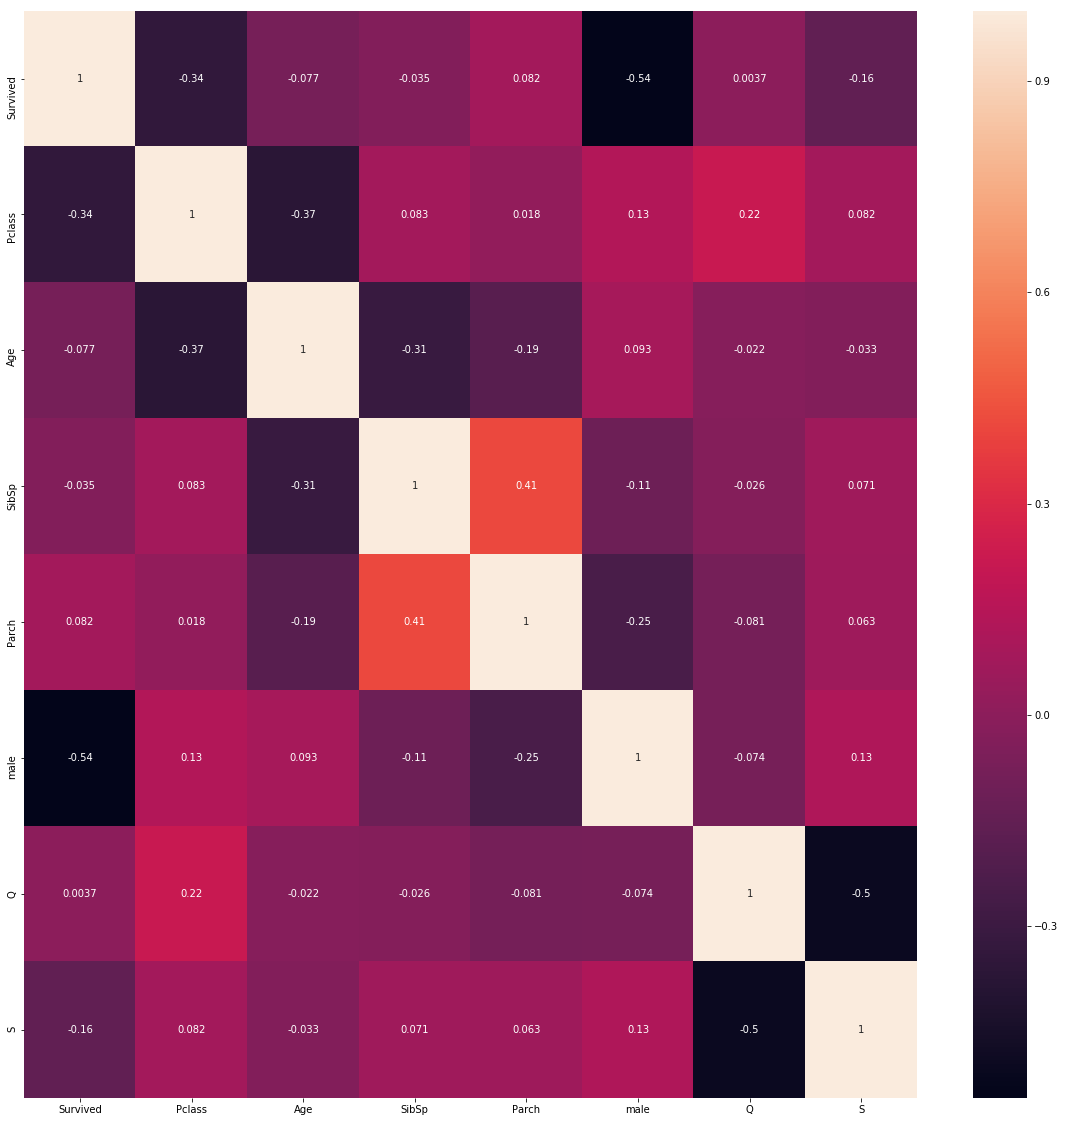

In [130]:
#draw the heatmap to show the correlation between variables
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [131]:
#function to compute age for NaN for a given PClass
def impute_age(cols):
    age=cols[1]
    clas=cols[0]
    if pd.isnull(age):
        if clas==1:
            return 38
        elif clas==2:
            return 29
        else:
            return 25
    else:
        return age

In [132]:
#apply the function on dataset to calculate age for NaN values
df['Age']=df[['Pclass','Age']].apply(impute_age,axis=1)

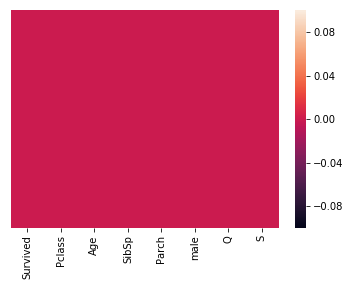

In [133]:
#see the heatmap for null values after removing nulls for age
sns.heatmap(df.isnull(),yticklabels=False)

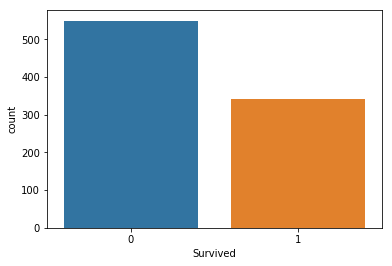

In [134]:
#see the dataset whether it is balanced or non balanced
sns.countplot(x='Survived',data=df)

In [135]:
#create variables to hold dependent and independent variables
x=df.drop('Survived',axis=1)
y=df['Survived']

In [136]:
#apply logistic regression with cross validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
lr=LogisticRegression()
score=cross_val_score(lr,x,y,cv=10)


In [137]:
#check the score
print(score.mean())

0.795737714221


In [139]:
#check with randomforest classification
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=10)
score=cross_val_score(rfc,x,y,cv=10)
print(score.mean())

0.79924639655
